In [45]:
import matplotlib.pyplot as plt
import json
from Paras import Para
import numpy as np
import seaborn as sn
import pandas as pd

# Full Songs

In [6]:
with open(Para.LOG_SAVE_FOLD + 'cnnTest.json', 'r') as f:
    cnnTest = json.load(f)
with open(Para.LOG_SAVE_FOLD + 'crnnTest.json', 'r') as f:
    crnnTest = json.load(f)
with open(Para.LOG_SAVE_FOLD + 'lcrnnTest.json', 'r') as f:
    lcrnnTest = json.load(f)

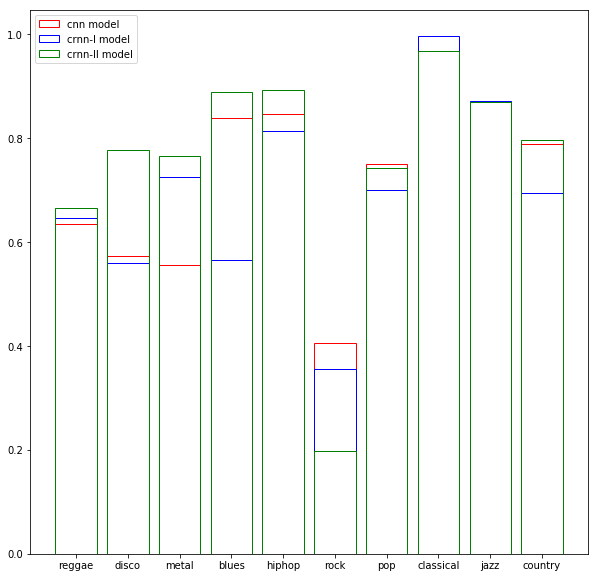

In [55]:
plt.figure(figsize=(10, 10))
plt.bar(range(len(cnnTest)), cnnTest.values(), 
        align='center', 
        color= (0,0,0,0),
        edgecolor = 'r',
        label='cnn model')

plt.bar(range(len(crnnTest)), crnnTest.values(), 
        align='center', 
        color=(0,0,0,0),
        edgecolor = 'b',
        label='crnn-I model')

plt.bar(range(len(lcrnnTest)), lcrnnTest.values(), 
        align='center', 
        color=(0,0,0,0),
        edgecolor = 'g',
        label='crnn-II model')

plt.xticks(range(len(cnnTest)), cnnTest.keys())
plt.legend(loc="upper left")
plt.show()

# Training

In [16]:
with open(Para.LOG_SAVE_FOLD + 'CnnModel.json', 'r') as f:
    cnn = json.load(f)
with open(Para.LOG_SAVE_FOLD + 'CrnnModel.json', 'r') as f:
    crnn = json.load(f)
with open(Para.LOG_SAVE_FOLD + 'CrnnLongModel.json', 'r') as f:
    lcrnn = json.load(f)

## Loss

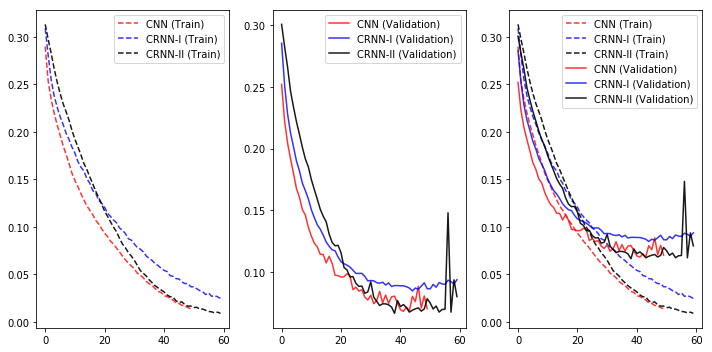

In [51]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(cnn['train_loss'], '--', color=(1,0,0,0.8), label='CNN (Train)')
plt.plot(crnn['train_loss'], '--', color=(0,0,1,0.8), label='CRNN-I (Train)')
plt.plot(lcrnn['train_loss'], '--', color=(0,0,0,0.9), label='CRNN-II (Train)')
plt.legend(loc="upper right")
plt.subplot(1, 3, 2)
plt.plot(cnn['valid_loss'], '-', color=(1,0,0,0.8), label='CNN (Validation)')
plt.plot(crnn['valid_loss'], '-', color=(0,0,1,0.8), label='CRNN-I (Validation)')
plt.plot(lcrnn['valid_loss'], '-', color=(0,0,0,0.9), label='CRNN-II (Validation)')
plt.legend(loc="upper right")
plt.subplot(1, 3, 3)
plt.plot(cnn['train_loss'], '--', color=(1,0,0,0.8), label='CNN (Train)')
plt.plot(crnn['train_loss'], '--', color=(0,0,1,0.8), label='CRNN-I (Train)')
plt.plot(lcrnn['train_loss'], '--', color=(0,0,0,0.9), label='CRNN-II (Train)')
plt.plot(cnn['valid_loss'], '-', color=(1,0,0,0.8), label='CNN (Validation)')
plt.plot(crnn['valid_loss'], '-', color=(0,0,1,0.8), label='CRNN-I (Validation)')
plt.plot(lcrnn['valid_loss'], '-', color=(0,0,0,0.9), label='CRNN-II (Validation)')
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

## Accuracy

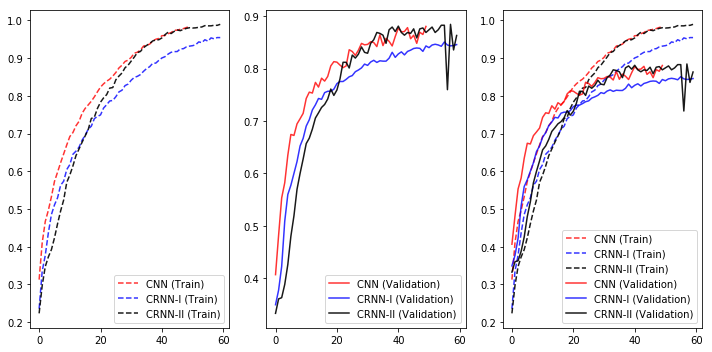

In [53]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(cnn['train_accu'], '--', color=(1,0,0,0.8), label='CNN (Train)')
plt.plot(crnn['train_accu'], '--', color=(0,0,1,0.8), label='CRNN-I (Train)')
plt.plot(lcrnn['train_accu'], '--', color=(0,0,0,0.9), label='CRNN-II (Train)')
plt.legend(loc="best")
plt.subplot(1, 3, 2)
plt.plot(cnn['valid_accu'], '-', color=(1,0,0,0.8), label='CNN (Validation)')
plt.plot(crnn['valid_accu'], '-', color=(0,0,1,0.8), label='CRNN-I (Validation)')
plt.plot(lcrnn['valid_accu'], '-', color=(0,0,0,0.9), label='CRNN-II (Validation)')
plt.legend(loc="best")
plt.subplot(1, 3, 3)
plt.plot(cnn['train_accu'], '--', color=(1,0,0,0.8), label='CNN (Train)')
plt.plot(crnn['train_accu'], '--', color=(0,0,1,0.8), label='CRNN-I (Train)')
plt.plot(lcrnn['train_accu'], '--', color=(0,0,0,0.9), label='CRNN-II (Train)')
plt.plot(cnn['valid_accu'], '-', color=(1,0,0,0.8), label='CNN (Validation)')
plt.plot(crnn['valid_accu'], '-', color=(0,0,1,0.8), label='CRNN-I (Validation)')
plt.plot(lcrnn['valid_accu'], '-', color=(0,0,0,0.9), label='CRNN-II (Validation)')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Confusion Matrix

In [48]:
cnn_m, crnn_m, lcrnn_m = np.zeros((10, 10)), np.zeros((10, 10)), np.zeros((10, 10))

In [49]:
with open(Para.LOG_SAVE_FOLD + 'CnnMatrix.json', 'r') as f:
    cnn_l = json.load(f)
with open(Para.LOG_SAVE_FOLD + 'CrnnMatrix.json', 'r') as f:
    crnn_l = json.load(f)
with open(Para.LOG_SAVE_FOLD + 'CrnnLongMatrix.json', 'r') as f:
    lcrnn_l = json.load(f)

In [50]:
for point in cnn_l:
    i, j = point
    cnn_m[i][j] += 1
    
for point in crnn_l:
    i, j = point
    crnn_m[i][j] += 1

for point in lcrnn_l:
    i, j = point
    lcrnn_m[i][j] += 1

In [51]:
cnn_m/=sum(cnn_m)
crnn_m/=sum(crnn_m)
lcrnn_m/=sum(lcrnn_m)

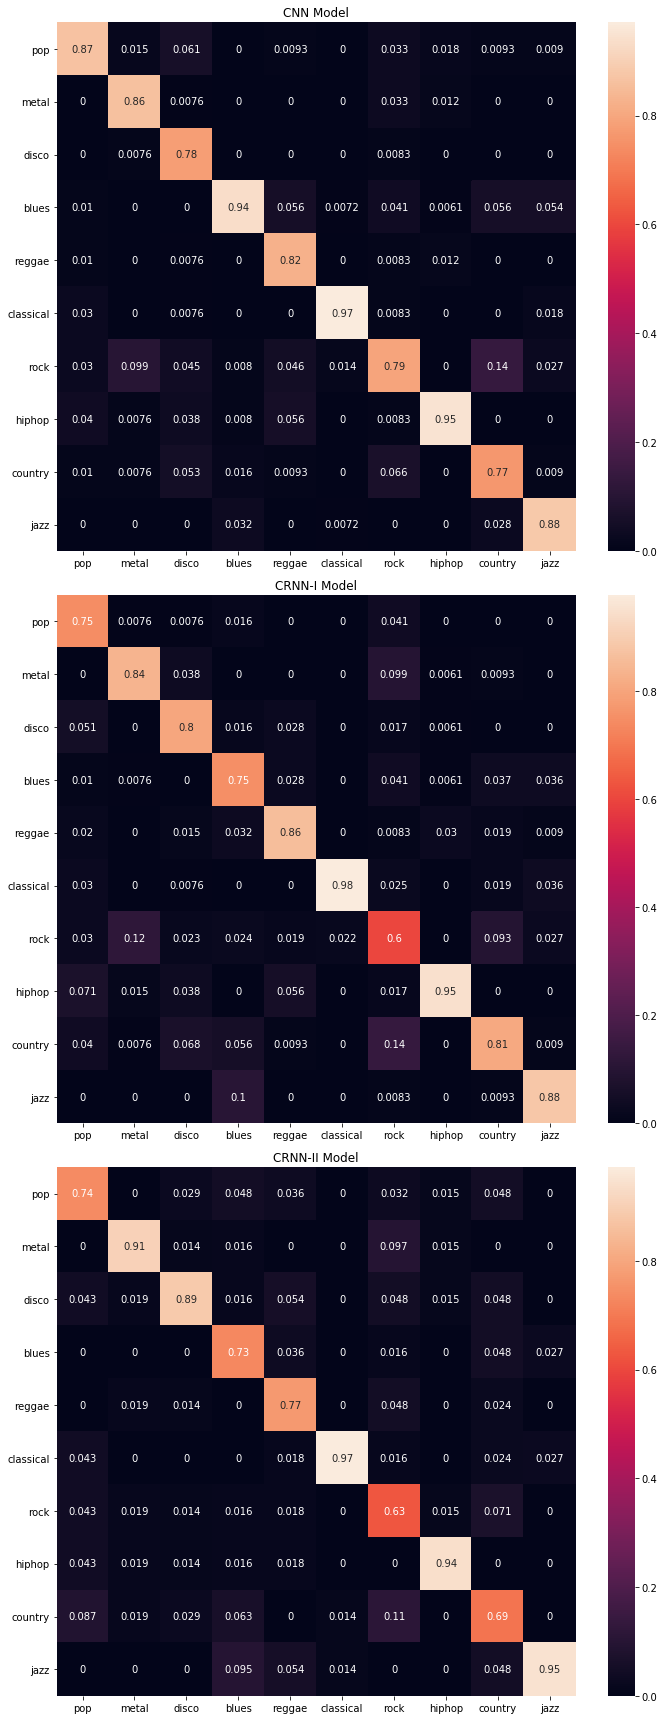

In [53]:
cnn_m = pd.DataFrame(cnn_m, index = [Para.dictionary.get(i) for i in range(10)],
                  columns = [Para.dictionary.get(i) for i in range(10)],)
crnn_m = pd.DataFrame(crnn_m, index = [Para.dictionary.get(i) for i in range(10)],
                  columns = [Para.dictionary.get(i) for i in range(10)],)
lcrnn_m = pd.DataFrame(lcrnn_m, index = [Para.dictionary.get(i) for i in range(10)],
                  columns = [Para.dictionary.get(i) for i in range(10)],)
plt.figure(figsize=(10, 24))
plt.subplot(3, 1, 1)
plt.title('CNN Model')
sn.heatmap(cnn_m, annot=True,)
plt.subplot(3, 1, 2)
plt.title('CRNN-I Model')
sn.heatmap(crnn_m, annot=True,)
plt.subplot(3, 1, 3)
plt.title('CRNN-II Model')
sn.heatmap(lcrnn_m, annot=True,)
plt.tight_layout()
plt.savefig('matrix.png')